In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
warnings.filterwarnings('ignore')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [2]:
train=pd.read_csv('train.csv')
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
test=pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
#storing the length
train_len=len(train)
test_len=len(test)

In [5]:
#concatinating both dataframes
df=pd.concat([train,test],axis=0)

In [6]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",NaN,NaN,NaN,NaN,NaN,NaN
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,NaN,NaN,NaN,NaN,NaN,NaN
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",NaN,NaN,NaN,NaN,NaN,NaN
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",NaN,NaN,NaN,NaN,NaN,NaN
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel...",NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(len(test),len(train),len(df))

153164 159571 312735


In [9]:
#reseting the index
df.reset_index(drop=True,inplace=True)
df.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
312730,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",NaN,NaN,NaN,NaN,NaN,NaN
312731,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,NaN,NaN,NaN,NaN,NaN,NaN
312732,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",NaN,NaN,NaN,NaN,NaN,NaN
312733,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",NaN,NaN,NaN,NaN,NaN,NaN
312734,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel...",NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dtypes

id                   object
comment_text         object
malignant           float64
highly_malignant    float64
rude                float64
threat              float64
abuse               float64
loathe              float64
dtype: object

In [11]:
df.isnull().sum()

id                       0
comment_text             0
malignant           153164
highly_malignant    153164
rude                153164
threat              153164
abuse               153164
loathe              153164
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312735 entries, 0 to 312734
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                312735 non-null  object 
 1   comment_text      312735 non-null  object 
 2   malignant         159571 non-null  float64
 3   highly_malignant  159571 non-null  float64
 4   rude              159571 non-null  float64
 5   threat            159571 non-null  float64
 6   abuse             159571 non-null  float64
 7   loathe            159571 non-null  float64
dtypes: float64(6), object(2)
memory usage: 19.1+ MB


# EDA

0.0    144277
1.0     15294
Name: malignant, dtype: int64


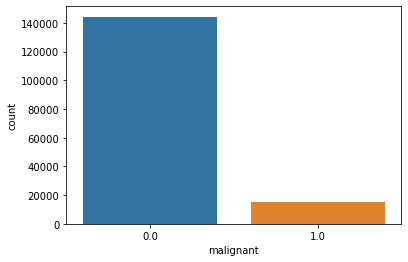

0.0    157976
1.0      1595
Name: highly_malignant, dtype: int64


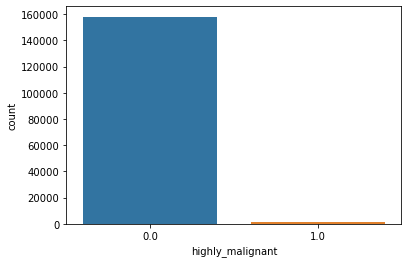

0.0    158166
1.0      1405
Name: loathe, dtype: int64


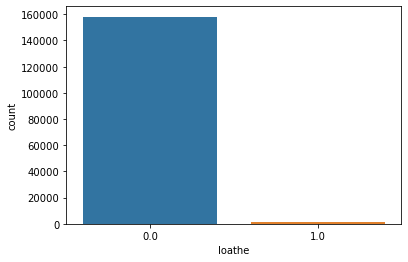

0.0    151122
1.0      8449
Name: rude, dtype: int64


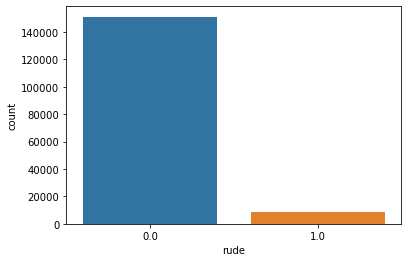

0.0    151694
1.0      7877
Name: abuse, dtype: int64


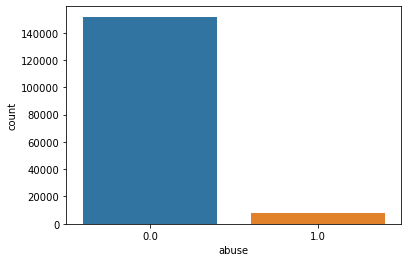

0.0    159093
1.0       478
Name: threat, dtype: int64


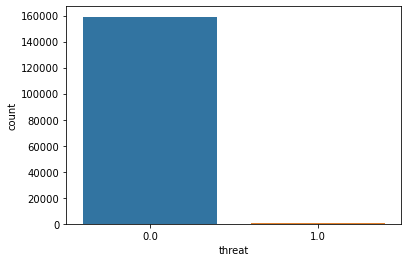

In [13]:
col = ['malignant', 'highly_malignant', 'loathe', 'rude', 'abuse', 'threat']
for i in col:
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()

In [14]:
df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

# Correlation

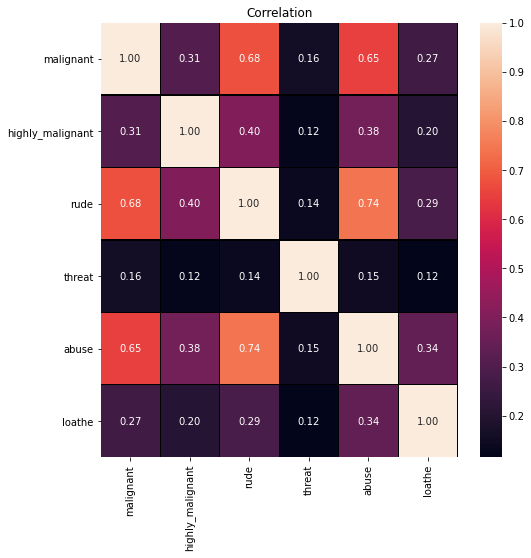

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.title("Correlation")
plt.show()

# NLP Preprocessing

In [16]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [17]:
# Replace email addresses with 'email'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')


# Remove punctuation
df['comment_text'] = df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['comment_text'] = df['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['comment_text'] = df['comment_text'].str.replace(r'^\s+|\s+?$', '')

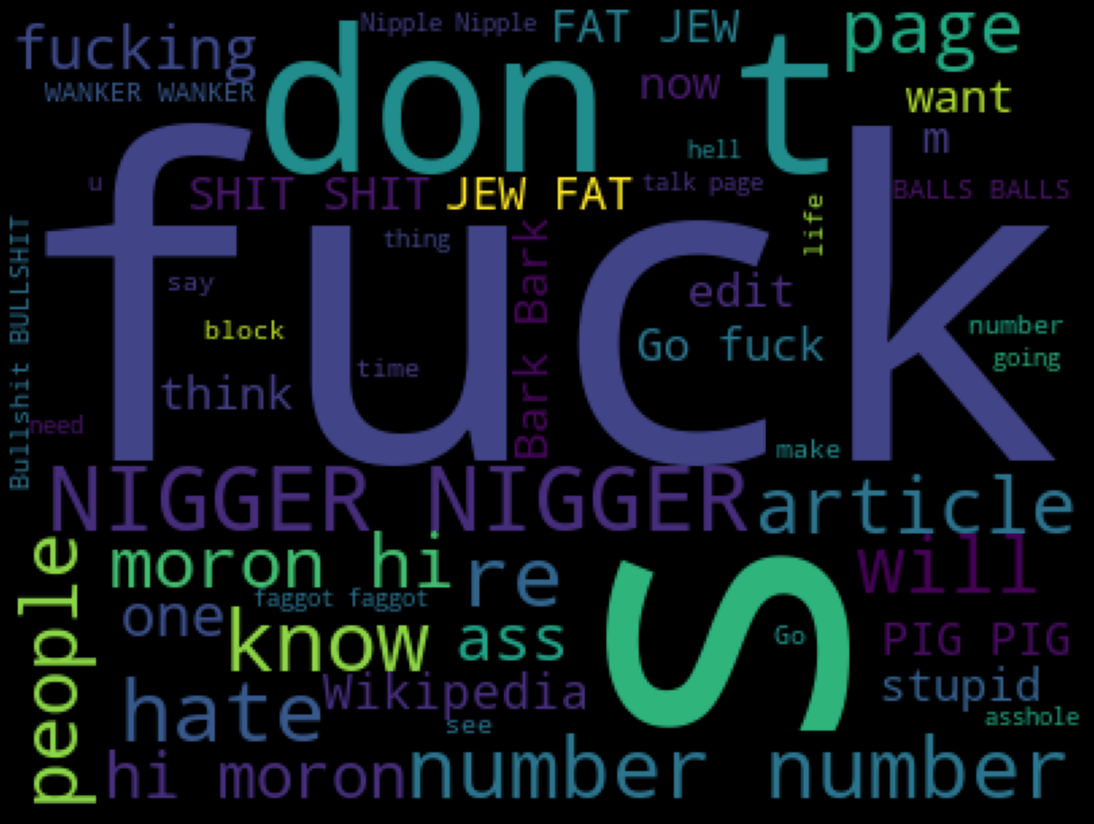

In [18]:
#comments offensive words visualization using wordcloud

hams = df['comment_text'][df['malignant']==1]
spam_cloud = WordCloud(width=400, height=300, background_color = 'black', max_words=50).generate(''. join(hams))
plt.figure(figsize=(15,15), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

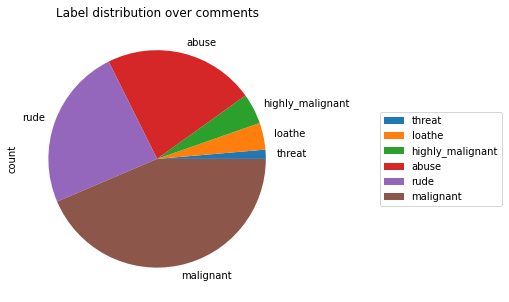

In [19]:
#percentages of type of the comment malignant, highly malignant...
df_distribution = df[col].sum()\
                          .to_frame()\
                          .rename(columns={0: 'count'})\
                          .sort_values('count')
df_distribution.plot.pie(y = 'count', 
                         title = 'Label distribution over comments', 
                         figsize=(5,5))\
.legend(loc = 'center left', bbox_to_anchor = (1.3, 0.5))

Malignant comments are most

In [20]:
df['id'].head(3)

0    0000997932d777bf
1    000103f0d9cfb60f
2    000113f07ec002fd
Name: id, dtype: object

In [21]:
#encoding column id
df['id']=LabelEncoder().fit_transform(df['id'])

In [22]:
#encoded using label encoder
df['id'].head()

0     2
1     3
2     4
3     9
4    10
Name: id, dtype: int32

# Lemmatization

In [23]:
lemmatizer = WordNetLemmatizer()

for i in range(len(df['comment_text'])):
    df['comment_text'][i] = df['comment_text'][i].lower()
    b = []
    for word in df['comment_text'][i].split():
        b.append(lemmatizer.lemmatize(word, pos="v"))
        df['comment_text'][i] = "".join(b)

# Vectorization

In [24]:
#seperating training and testing dataset
train=df.iloc[:train_len,:]
test=df.iloc[train_len:,:]

In [25]:
#performing vectorization and splitting dependent and independent

tf_vec = TfidfVectorizer()

x = train.drop('malignant', axis = 1)

y = train['malignant']

In [26]:
x=tf_vec.fit_transform(train['comment_text'])

# Model Building

In [27]:
MNB=MultinomialNB()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

MNB.fit(x_train,y_train)

predmn=MNB.predict(x_test)

print("Report=",classification_report(y_test,predmn))

print("accuracy=", accuracy_score(y_test,predmn))

Report=               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     36064
         1.0       1.00      0.00      0.00      3829

    accuracy                           0.90     39893
   macro avg       0.95      0.50      0.48     39893
weighted avg       0.91      0.90      0.86     39893

accuracy= 0.9040683829243226


In [28]:
#linear Svc
ls=LinearSVC()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

ls.fit(x_train,y_train)

predls=ls.predict(x_test)

print("Report=",classification_report(y_test,predls))

print("accuracy=", accuracy_score(y_test,predls))

Report=               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     36064
         1.0       0.89      0.01      0.02      3829

    accuracy                           0.90     39893
   macro avg       0.90      0.51      0.49     39893
weighted avg       0.90      0.90      0.86     39893

accuracy= 0.9048705286641767


In [29]:
#decision tree
DTC=DecisionTreeClassifier()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

DTC.fit(x_train,y_train)

predgn=DTC.predict(x_test)

print("Report=",classification_report(y_test,predgn))

print("accuracy=", accuracy_score(y_test,predgn))

Report=               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     36064
         1.0       0.89      0.01      0.02      3829

    accuracy                           0.90     39893
   macro avg       0.90      0.51      0.49     39893
weighted avg       0.90      0.90      0.86     39893

accuracy= 0.9048705286641767


In [31]:
#random forest
rn=RandomForestClassifier()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

rn.fit(x_train,y_train)

predrn=rn.predict(x_test)

print("Report=",classification_report(y_test,predrn))

print("accuracy=", accuracy_score(y_test,predrn))

Report=               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     36064
         1.0       0.89      0.01      0.02      3829

    accuracy                           0.90     39893
   macro avg       0.90      0.51      0.49     39893
weighted avg       0.90      0.90      0.86     39893

accuracy= 0.9048705286641767


# Cross Validation Score

In [32]:
print("CV score and it's mean of MultinomialNB:",cross_val_score(MNB,x,y,cv=6).mean(),"Accuracy Score:",accuracy_score(y_test,predmn))
print("CV score and it's mean of LinearSVC:",cross_val_score(ls,x,y,cv=6).mean(),"Accuracy Score:",accuracy_score(y_test,predls))
print("CV score and it's mean of Decision Tree:",cross_val_score(DTC,x,y,cv=6).mean(),"Accuracy Score:",accuracy_score(y_test,predgn))

CV score and it's mean of MultinomialNB: 0.9042056516981885 Accuracy Score: 0.9040683829243226
CV score and it's mean of LinearSVC: 0.9050516709098626 Accuracy Score: 0.9048705286641767
CV score and it's mean of Decision Tree: 0.9050516709098626 Accuracy Score: 0.9048705286641767


Models cv score and accuracy are equal so here I proceed with multinomial naive bayes as my final model

# Hyper Parameter Tuning

In [39]:
parameters={'alpha':np.arange(1.0,8.0),
          'fit_prior':['True','False']}

In [42]:
GSV=GridSearchCV(MNB,parameters,cv=6)

In [43]:
GSV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=MultinomialNB(),
             param_grid={'alpha': array([1., 2., 3., 4., 5., 6., 7.]),
                         'fit_prior': ['True', 'False']})

In [44]:
GSV.best_params_

{'alpha': 1.0, 'fit_prior': 'True'}

In [45]:
best=MultinomialNB(alpha=1.0,fit_prior=True)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(accuracy_score(y_test,predbest))
print(acc_b*100)

90.40683829243225


# Saving The model

In [48]:
#model saving
import joblib as jb
jb.dump(best,"comments.pkl")

['comments.pkl']

# Conclusion

In [46]:
a=np.array(y_test)
predicted=np.array(best.predict(x_test))
COMMENT=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
COMMENT

,Original,Predicted
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
39888,0.0,0.0
39889,1.0,0.0
39890,0.0,0.0
39891,0.0,0.0


Test data

In [49]:
test.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159571,0,yobitchjarulebemoresuccesfulthenyoulleverbewha...,NaN,NaN,NaN,NaN,NaN,NaN
159572,1,fromrfcthetitlebefineasitbeimo,NaN,NaN,NaN,NaN,NaN,NaN
159573,5,sourcezaweashtononlapland,NaN,NaN,NaN,NaN,NaN,NaN
159574,7,ifyouhavealookbackatthesourcetheinformationiup...,NaN,NaN,NaN,NaN,NaN,NaN
159575,8,idontanonymouslyeditarticleatall,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#dropping columns does not exist in test data
test=test.drop(columns=['malignant','highly_malignant','rude','threat','abuse','loathe'])
test.head()

,id,comment_text
159571,0,yobitchjarulebemoresuccesfulthenyoulleverbewha...
159572,1,fromrfcthetitlebefineasitbeimo
159573,5,sourcezaweashtononlapland
159574,7,ifyouhavealookbackatthesourcetheinformationiup...
159575,8,idontanonymouslyeditarticleatall


In [51]:
#vectorization on the feature comment text in test data

test['comment_text'] = tf_vec.fit_transform(test['comment_text'])

In [52]:
test.head()

,id,comment_text
159571,0,"(0, 144832)\t1.0\n (1, 32612)\t1.0\n (2, 1..."
159572,1,"(0, 144832)\t1.0\n (1, 32612)\t1.0\n (2, 1..."
159573,5,"(0, 144832)\t1.0\n (1, 32612)\t1.0\n (2, 1..."
159574,7,"(0, 144832)\t1.0\n (1, 32612)\t1.0\n (2, 1..."
159575,8,"(0, 144832)\t1.0\n (1, 32612)\t1.0\n (2, 1..."


In [47]:
predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [58]:
#Storing prediction output to dataframe
prediction_comment=pd.DataFrame({})
prediction_comment['ID']=test['id'][:39893]
prediction_comment['Comment']=predicted

In [59]:
prediction_comment.head()

,ID,Comment
159571,0,0.0
159572,1,0.0
159573,5,0.0
159574,7,0.0
159575,8,0.0


In [60]:
#to csv
prediction_comment.to_csv('test_prediction.csv',index=False)